# Regularized Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preliminary Flow

### Load Data

In [ ]:
# load data
medv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boston.csv')
medv.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
medv['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

### Split Data

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = medv.drop(columns='medv')
target = medv[['medv']]

feature_medv_train, feature_medv_test, target_medv_train, target_medv_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_medv_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


There are several features with high VIF scores:
1. `nox`
2. `dis`
3. `rad`
4. `tax`

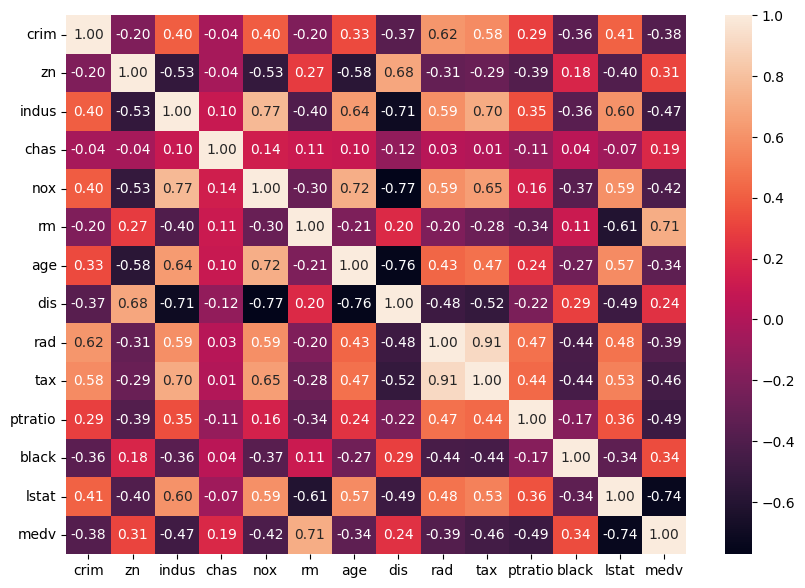

In [ ]:
# heatmap correlation
medv_train = pd.concat([feature_medv_train, target_medv_train], axis=1)
corr = medv_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

We choose to retain `tax`. Therefore, we need to drop:
* `nox`
* `dis`
* `rad`

In [ ]:
# drop redundant features
feature_medv_train = feature_medv_train.drop(columns=['nox','dis', 'rad'])
feature_medv_test = feature_medv_test.drop(columns=['nox','dis','rad'])

### Recheck VIF
Optional

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_medv_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.576797
2,zn,1.862308
3,indus,3.175204
4,chas,1.072548
5,rm,1.855735
6,age,2.341920
7,tax,2.958826
8,ptratio,1.502214
9,black,1.313018
10,lstat,2.761524


Good!

## Model Training

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_medv_train = feature_medv_train.to_numpy()
y_medv_train = target_medv_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
ridge_reg = Ridge(alpha=0.1,
                  random_state=42)

ridge_reg.fit(X_medv_train, y_medv_train)

Ridge(alpha=0.1, random_state=42)

In [ ]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_medv_train
model = ridge_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,6.795462
1,crim,-0.058799
2,zn,-0.014025
3,indus,0.018389
4,chas,3.039253
5,rm,5.098972
6,age,0.010021
7,tax,-0.000189
8,ptratio,-0.807435
9,black,0.012382


## Lasso

In [ ]:
from sklearn.linear_model import Lasso

# define the model
lasso_reg = Lasso(alpha=0.1,
                  random_state=42)

lasso_reg.fit(X_medv_train, y_medv_train)

Lasso(alpha=0.1, random_state=42)

In [ ]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_medv_train
model = lasso_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,8.862387
1,crim,-0.059013
2,zn,-0.012827
3,indus,0.017525
4,chas,1.537956
5,rm,4.816993
6,age,0.014206
7,tax,-0.000102
8,ptratio,-0.816959
9,black,0.012380


medv = 8.86 - 0.06 * crim - 0.01 * zn + 0.02 * indus + 1.54 * chas + 4.81 * rm + 0.01 * age - 0.82 * ptratio + 0.01 * black - 0.55 * lstat

# Workflow with choosing the best lambda

## Split data: train-validation-test

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = medv.drop(columns='medv')
target = medv[['medv']]

# First splitting: pretrain and test
feature_medv_pretrain, feature_medv_test, target_medv_pretrain, target_medv_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_medv_train, feature_medv_validation, target_medv_train, target_medv_validation = train_test_split(feature_medv_pretrain, target_medv_pretrain, test_size=0.20, random_state=42)

## Drop Multicollinear Features

In [ ]:
feature_medv_train = feature_medv_train.drop(columns=['nox','dis', 'rad'])
feature_medv_validation = feature_medv_validation.drop(columns=['nox','dis','rad'])
feature_medv_test = feature_medv_test.drop(columns=['nox','dis','rad'])

## Train Multiple Models
with different alpha (lambda)

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_medv_train = feature_medv_train.to_numpy()
y_medv_train = target_medv_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)
ridge_reg_hundred = Ridge(alpha=100, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_medv_train, y_medv_train)
ridge_reg_pointone.fit(X_medv_train, y_medv_train)
ridge_reg_one.fit(X_medv_train, y_medv_train)
ridge_reg_ten.fit(X_medv_train, y_medv_train)
ridge_reg_hundred.fit(X_medv_train, y_medv_train)

Ridge(alpha=100, random_state=42)

## Find the best model (alpha)
Based on validation set

In [ ]:
from sklearn.metrics import mean_squared_error

X_medv_validation = feature_medv_validation.to_numpy()
y_medv_validation = target_medv_validation.to_numpy()
y_medv_validation = y_medv_validation.reshape(len(y_medv_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 5.100886202642037
RMSE of Ridge regression model with alpha = 0.1 is 5.100288438419682
RMSE of Ridge regression model with alpha = 1.0 is 5.094521787042945
RMSE of Ridge regression model with alpha = 10 is 5.05166207510316


We can see that Ridge with `alpha = 10` has the smalles RMSE --> The best model

In [ ]:
from sklearn.metrics import mean_squared_error

X_medv_validation = feature_medv_validation.to_numpy()
y_medv_validation = target_medv_validation.to_numpy()
y_medv_validation = y_medv_validation.reshape(len(y_medv_validation),)

alphas = [0.1, 1., 10, 100]
models = [ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten,
          ridge_reg_hundred]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.1 is 5.100288438419682
RMSE of Ridge regression model with alpha = 1.0 is 5.094521787042945
RMSE of Ridge regression model with alpha = 10 is 5.05166207510316
RMSE of Ridge regression model with alpha = 100 is 4.990530896006184


We can see that Ridge with `alpha = 100` has the smalles RMSE --> The best model

### Coefficients

In [ ]:
ridge_best = ridge_reg_hundred

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,24.166776
1,crim,-0.052001
2,zn,-0.000627
3,indus,-0.004471
4,chas,0.580672
5,rm,2.737001
6,age,0.042880
7,tax,0.000524
8,ptratio,-0.913460
9,black,0.011340


medv = 24.17 - 0.05 * crim + 0.58 * chas + 2.74 * rm + 0.04 * age - 0.91 * ptratio + 0.01 * black - 0.71 * lstat

# Lasso!

## Train Multiple Models

In [ ]:
from sklearn.linear_model import Lasso

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)
lasso_reg_hundred = Lasso(alpha=100, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_medv_train, y_medv_train)
lasso_reg_pointone.fit(X_medv_train, y_medv_train)
lasso_reg_one.fit(X_medv_train, y_medv_train)
lasso_reg_ten.fit(X_medv_train, y_medv_train)
lasso_reg_hundred.fit(X_medv_train, y_medv_train)

Lasso(alpha=100, random_state=42)

## Find the best model (alpha)
Based on validation set

In [ ]:
alphas = [0.01, 0.1, 1., 10, 100]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten,
          lasso_reg_hundred]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 5.097514590498467
RMSE of Lasso regression model with alpha = 0.1 is 5.08016984806439
RMSE of Lasso regression model with alpha = 1.0 is 4.988309999786157
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769
RMSE of Lasso regression model with alpha = 100 is 7.414941587469617


### Coefficients

In [ ]:
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.945673
1,crim,-0.034953
2,zn,0.001941
3,indus,-0.000000
4,chas,0.000000
5,rm,2.572882
6,age,0.041419
7,tax,-0.001003
8,ptratio,-0.757735
9,black,0.011371


### Diagnostic Study
Not mandatory

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_medv_train)

print('R-squared for training data is {}'.format(r2_score(y_medv_train, y_predict_train)))

R-squared for training data is 0.6992024011892548


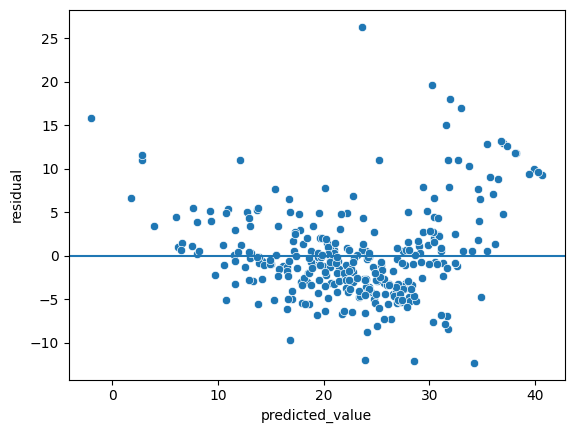

In [ ]:
# calculate residuals
residual = y_medv_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Asumsi:
1. Linear relationship: OK. Garis horizontal y=0 cukup merepresentasikan keseluruhan titik residual.
2. Variance stable: NO. Variasinya itu dari kecil (di bagian kiri) ke lebar (di bagian kanan)
3. Independent residual: OK. Tidak ada pattern yang mencolok pada residuals yang berdekatan.

## Model Evaluation
The Best Ridge Regression

### Training Error

In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_medv_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_medv_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_medv_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_medv_train, y_predict_train)))

RMSE for training data is 5.226947269742592
MAE for training data is 3.7669043468472254
MAPE for training data is 0.17907962362799554


Untuk rentang nilai medv dari min = 5 dan max = 50, RMSE 5.22 masih tergolong wajar.
MAPE juga masih dibawah 30%, jadi masih aman.

Training Error, RMSE

### Testing Error

In [ ]:
# prepare prediction result on test data
X_medv_test = feature_medv_test.to_numpy()
y_predict_test = ridge_best.predict(X_medv_test)

# ground truth target
y_medv_test = target_medv_test.to_numpy()
y_medv_test = y_medv_test.reshape(len(y_medv_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_medv_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_medv_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_medv_test, y_predict_test)))

RMSE for testing data is 5.312479338971449
MAE for testing data is 3.4713563844105906
MAPE for testing data is 0.18198188840300997


Perbedaan antara Train & Test tidak terlalu berbeda jauh, berarti model sudah fit tidak overfitting.

MAPE yang bagus dibawah 30% dibawah 30 % masih bisa diterima

Untuk evaluasi tes misal hasilnya test lebih jelek dari hasil train data, max kayak MAPE, yaitu 30%.

Kalau lebih jeleknya sd 2 x lipat berati overfit